In [254]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import io
import PIL


In [255]:
# Reading in the csv data
data = pd.read_csv('/Users/admin/Documents/Summer Research/sid-project/data/Casos_Diarios_Estado_Nacional_Confirmados_2020081.csv',
encoding='latin-1')



In [256]:
data.head()

,cv_ent,poblacion,nombre,12/1/20,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,4/8/20,5/8/20,6/8/20,7/8/20,8/8/20,9/8/20,10/8/20,11/8/20,12/8/20,13-08-2020
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,72,52,41,38,20,14,51,6,0,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,133,102,88,30,36,21,28,4,2,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,142,152,123,110,81,43,132,90,9,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,65,49,45,22,17,14,27,5,0,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,30,33,28,9,4,7,16,8,3,0


In [242]:
data=data.groupby('cv_ent').sum()


In [244]:
data=data.drop(columns=['poblacion'])


In [245]:
data.head()

,12/1/20,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,21-01-2020,...,4/8/20,5/8/20,6/8/20,7/8/20,8/8/20,9/8/20,10/8/20,11/8/20,12/8/20,13-08-2020
cv_ent,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,72,52,41,38,20,14,51,6,0,0
2,0,0,0,0,0,0,0,0,0,0,...,133,102,88,30,36,21,28,4,2,0
3,0,0,0,0,0,0,0,0,0,0,...,142,152,123,110,81,43,132,90,9,0
4,0,0,0,0,0,0,0,0,0,0,...,65,49,45,22,17,14,27,5,0,0
5,0,0,0,0,0,0,0,0,0,0,...,380,332,331,312,162,58,222,141,16,0


In [246]:
# Read Mexico map sh

states = gpd.read_file(r'/Users/admin/Documents/Summer Research/sid-project/Maps/mexico_states/destdv250k_2gw.shp')

In [248]:
states.head()

,AREA,PERIMETER,COV_,COV_ID,ENTIDAD,CAPITAL,RASGO_GEOG,NUM_EDO,geometry
0,6.710632,22.081488,2,1,BAJA CALIFORNIA,Mexicali,None,02,"POLYGON ((-116.15195 32.61459, -116.13523 32.6..."
1,16.687178,36.642330,3,2,SONORA,Hermosillo,None,26,"POLYGON ((-114.81361 32.49456, -114.81306 32.4..."
2,0.000045,0.032972,4,3,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.29441 32.43412, -117.29514 32.4..."
3,0.000004,0.008558,5,4,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.26293 32.42339, -117.26320 32.4..."
4,0.000012,0.021596,6,5,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.25951 32.41480, -117.25991 32.4..."


In [249]:
states['NUM_EDO']=states['NUM_EDO'].astype('int64')

In [250]:
states=states[['NUM_EDO','geometry']]


In [251]:
states.head()

,NUM_EDO,geometry
0,2,"POLYGON ((-116.15195 32.61459, -116.13523 32.6..."
1,26,"POLYGON ((-114.81361 32.49456, -114.81306 32.4..."
2,2,"POLYGON ((-117.29441 32.43412, -117.29514 32.4..."
3,2,"POLYGON ((-117.26293 32.42339, -117.26320 32.4..."
4,2,"POLYGON ((-117.25951 32.41480, -117.25991 32.4..."


In [252]:
merge = states.join(data,on='NUM_EDO',how='right')
merge.head()

,NUM_EDO,geometry,12/1/20,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,...,4/8/20,5/8/20,6/8/20,7/8/20,8/8/20,9/8/20,10/8/20,11/8/20,12/8/20,13-08-2020
800,1,"POLYGON ((-101.99762 22.12292, -101.99752 22.1...",0,0,0,0,0,0,0,0,...,72,52,41,38,20,14,51,6,0,0
0,2,"POLYGON ((-116.15195 32.61459, -116.13523 32.6...",0,0,0,0,0,0,0,0,...,133,102,88,30,36,21,28,4,2,0
2,2,"POLYGON ((-117.29441 32.43412, -117.29514 32.4...",0,0,0,0,0,0,0,0,...,133,102,88,30,36,21,28,4,2,0
3,2,"POLYGON ((-117.26293 32.42339, -117.26320 32.4...",0,0,0,0,0,0,0,0,...,133,102,88,30,36,21,28,4,2,0
4,2,"POLYGON ((-117.25951 32.41480, -117.25991 32.4...",0,0,0,0,0,0,0,0,...,133,102,88,30,36,21,28,4,2,0


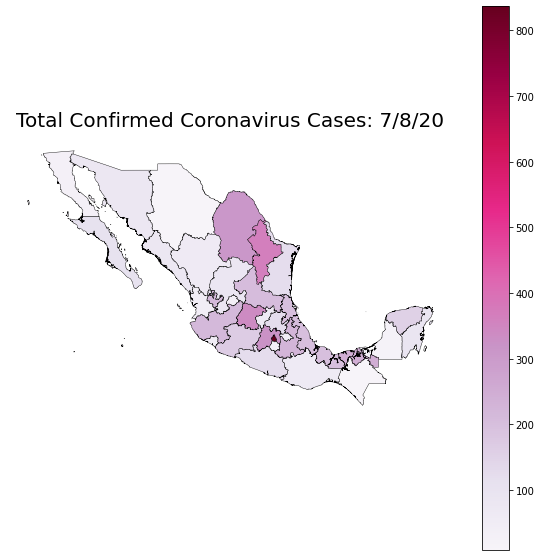

In [253]:
image_frames = []


for dates in merge.columns.to_list()[210:211]:

    # Plot

    ax = merge.plot(column=dates,
                    cmap='PuRd',
                    figsize=(10, 10),
                    legend=True,
                    edgecolor='black',
                    linewidth=0.4)

    # Add a title to the map
    ax.set_title('Total Confirmed Coronavirus Cases: ' +
                 dates, fontdict={'fontsize': 20}, pad=12.5)
    
    
    


    # Removing the axes

    ax.set_axis_off()


    img = ax.get_figure()
    
   


    


    f = io.BytesIO()

    img.savefig(f, format='png', bbox_inches='tight')

    f.seek(0)

    image_frames.append(PIL.Image.open(f))
    
        